In [79]:

import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, SparsePCA, FastICA, NMF, KernelPCA
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding, SpectralEmbedding

### Read images from folder

In [57]:
folder = "D:/magist/semestr 2/UczNienadwz/UNN/datasets/n0.07_b1e-05_r30_s15/hiragana_img/"

images = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)

images = np.array(images)
print("images", images.shape)

images (8, 3648, 2560)


### Reshape to 1d

In [58]:
images = np.reshape(images, (-1, 3648*2560))
print("images_reshape", images.shape)
N_COMP = 8

images_reshape (8, 9338880)


### PCA (Principal component analysis)

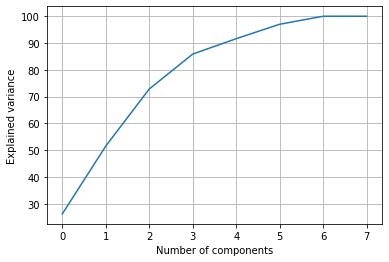

images_reduced (8, 8)


In [59]:
pca = PCA(n_components = N_COMP)
pca.fit(images)

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

images_reduced = pca.transform(images)
# test_images_reduced = pca.transform(test_images)
print("images_reduced", images_reduced.shape)

### KPCA (Kernel Principal component analysis)

In [62]:
kernel_pca = KernelPCA(n_components=N_COMP, kernel='linear')
kernel_pca.fit(images)

images_reduced = kernel_pca.transform(images)
print("images_reduced", images_reduced.shape)

images_reduced (8, 8)


In [63]:
### SparsePCA (Sparse Principal Components Analysis)

In [87]:
sparse_pca = SparsePCA(n_components=N_COMP, max_iter = 7)
sparse_pca.fit(images)

images_reduced = sparse_pca.transform(images)
print("images_reduced", images_reduced.shape)

KeyboardInterrupt: 

### FastICA (a fast algorithm for Independent Component Analysis)

In [65]:
fast_ica = FastICA(n_components=N_COMP, random_state=0, whiten='unit-variance')
fast_ica.fit(images)

images_reduced = fast_ica.transform(images)
print("images_reduced", images_reduced.shape)

d:\magist\projekty\analizaobrazow\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


images_reduced (8, 8)


### NMF (Non-Negative Matrix Factorization)

In [86]:
nmf = NMF(n_components=N_COMP, init='random', random_state=0, max_iter = 20)
nmf.fit(images)

images_reduced = nmf.transform(images)
print("images_reduced", images_reduced.shape)

d:\magist\projekty\analizaobrazow\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn(


images_reduced (8, 8)


d:\magist\projekty\analizaobrazow\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 20 reached. Increase it to improve convergence.
  warnings.warn(


### Isomap Embedding

In [73]:
# need PSD file ???????????????????????
isomap = Isomap(n_components=N_COMP)

images_reduced = isomap.fit_transform(images)
print("images_reduced", images_reduced.shape)

ValueError: There are significant negative eigenvalues (0.382201 of the maximum positive). Either the matrix is not PSD, or there was an issue while computing the eigendecomposition of the matrix.

### MDS (Multidimensional scaling)

In [72]:
mds = MDS(n_components=N_COMP)

images_reduced = mds.fit_transform(images)
print("images_reduced", images_reduced.shape)

images_reduced (8, 8)


### LLE (Locally Linear Embedding)

In [78]:
lle = LocallyLinearEmbedding(n_components=N_COMP-1)
lle.fit(images)

images_reduced = lle.transform(images)
print("images_reduced", images_reduced.shape)

images_reduced (8, 7)


### Laplacian (Spectral embedding for non-linear dimensionality reduction)

In [83]:
## WHAAAT ?????????????????????????????????????????
laplacian = SpectralEmbedding(n_components=6)

images_reduced = laplacian.fit_transform(images)
print("images_reduced", images_reduced.shape)

images_reduced (8, 6)


d:\magist\projekty\analizaobrazow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
